In [1]:
# Import modules
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


In [2]:
# Define data filepath
pathname = '/Users/jack/Documents/GitHub/geospatial-data-science/labs/lab2/wildfire_data/'

# Read data
df = gpd.read_file(pathname + 'or_1992-2018.shp') # 'df' stands for DataFrame

In [3]:
# Find column labels
df.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYS', 'SOURCE_S_1',
       'NWCG_REPOR', 'NWCG_REP_1', 'NWCG_REP_2', 'SOURCE_REP', 'SOURCE_R_1',
       'LOCAL_FIRE', 'LOCAL_INCI', 'FIRE_CODE', 'FIRE_NAME', 'ICS_209_PL',
       'ICS_209__1', 'MTBS_ID', 'MTBS_FIRE_', 'COMPLEX_NA', 'FIRE_YEAR',
       'DISCOVERY_', 'DISCOVER_1', 'DISCOVER_2', 'NWCG_CAUSE', 'NWCG_GENER',
       'NWCG_CAU_1', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE',
       'FIRE_SIZE_', 'LATITUDE', 'LONGITUDE', 'OWNER_DESC', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'geometry'],
      dtype='object')

In [4]:
# Find columns datatypes
df.dtypes

OBJECTID       float64
FOD_ID           int64
FPA_ID          object
SOURCE_SYS      object
SOURCE_S_1      object
NWCG_REPOR      object
NWCG_REP_1      object
NWCG_REP_2      object
SOURCE_REP      object
SOURCE_R_1      object
LOCAL_FIRE      object
LOCAL_INCI      object
FIRE_CODE       object
FIRE_NAME       object
ICS_209_PL      object
ICS_209__1      object
MTBS_ID         object
MTBS_FIRE_      object
COMPLEX_NA      object
FIRE_YEAR        int64
DISCOVERY_      object
DISCOVER_1       int64
DISCOVER_2      object
NWCG_CAUSE      object
NWCG_GENER      object
NWCG_CAU_1      object
CONT_DATE       object
CONT_DOY       float64
CONT_TIME       object
FIRE_SIZE      float64
FIRE_SIZE_      object
LATITUDE       float64
LONGITUDE      float64
OWNER_DESC      object
STATE           object
COUNTY          object
FIPS_CODE       object
FIPS_NAME       object
geometry      geometry
dtype: object

In [5]:
# Get some stats for numeric columns
df['FIRE_SIZE'].describe()

count     67042.000000
mean        144.878795
std        3815.600420
min           0.010000
25%           0.100000
50%           0.100000
75%           0.330000
max      558198.300000
Name: FIRE_SIZE, dtype: float64

In [6]:
# Filter fires larger than 100 acres
df_large = df[df['FIRE_SIZE'] > 100]

In [7]:
# Find mean size of wildfires larger than 100 acres
df_large['FIRE_SIZE'].mean()

5077.047927022739

In [8]:
# Find the different cause of large wildfires
df_large['NWCG_CAUSE'].unique()

array(['Human', 'Natural', 'Missing data/not specified/undetermined'],
      dtype=object)

In [9]:
# Filter fires that were caused by natural causes
df_large_natural = df_large[df_large['NWCG_CAUSE'] == 'Natural']

In [10]:
# Find date of discovery
df_large_natural['DISCOVERY_']

56       2008/07/02 00:00:00.000
89       2000/07/22 00:00:00.000
95       2007/08/31 00:00:00.000
96       2003/06/29 00:00:00.000
109      2007/07/13 00:00:00.000
                  ...           
67007    2017/08/29 00:00:00.000
67008    2011/09/15 00:00:00.000
67014    2014/09/16 00:00:00.000
67017    2013/08/07 00:00:00.000
67022    2016/08/17 00:00:00.000
Name: DISCOVERY_, Length: 1164, dtype: object

In [11]:
datetime = pd.to_datetime(df_large_natural['DISCOVERY_'], format='%Y/%m/%d %H:%M:%S.%f')
datetime

56      2008-07-02
89      2000-07-22
95      2007-08-31
96      2003-06-29
109     2007-07-13
           ...    
67007   2017-08-29
67008   2011-09-15
67014   2014-09-16
67017   2013-08-07
67022   2016-08-17
Name: DISCOVERY_, Length: 1164, dtype: datetime64[ns]

In [12]:
df_large_natural['datetime'] = datetime # Sorry about the warning, extra credit if someone can fix this!

/Users/jack/Documents/Anaconda3/anaconda3/envs/lab2/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [13]:
# Filter large, natural wildfires in 2016
df_large_natural_2016 = df_large_natural[df_large_natural['datetime'].dt.year == 2016]

In [14]:
# Find number of large fires in each year (i.e. number of rows in each year)
large_fire_count = df_large.iloc[:,0].groupby(df_large_natural['datetime'].dt.year).count()

In [15]:
# Find acres of wildfire for each year
large_fire_area = df_large['FIRE_SIZE'].groupby(df_large_natural['datetime'].dt.year).sum()

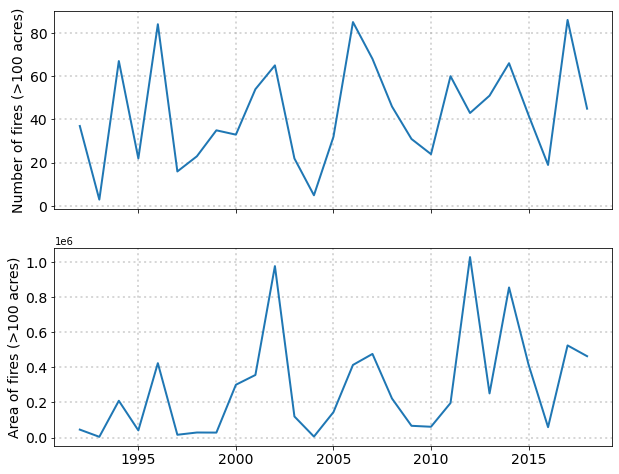

In [16]:
# Plot number and acres of wildfire for each year
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,8), sharex=True)
ax1.plot(large_fire_count, lw=2)
ax1.set_ylabel('Number of fires (>100 acres)', fontsize=14)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.grid(ls='dotted', lw=2, alpha=0.5)

ax2.plot(large_fire_area, lw=2)
ax2.set_ylabel('Area of fires (>100 acres)', fontsize=14)
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.grid(ls='dotted', lw=2, alpha=0.5)

# Question 1a


In [17]:

#df_large['FIRE_SIZE'].groupby(df_large_natural)
df_large = df[df['FIRE_SIZE'] > 50]

In [18]:
# Find the fire area in acres
#large_fire_area = df_large['FIRE_SIZE'].groupby(df_large_natural['datetime'].dt.year).sum()

In [19]:
# Filter fires that were caused by human causes
df_large = df_large[df_large['NWCG_CAUSE'] == 'Human']

In [20]:
most_count = df_large.groupby('FIPS_NAME').count()

In [21]:
most_count.sort_values(by='OBJECTID')

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYS,SOURCE_S_1,NWCG_REPOR,NWCG_REP_1,NWCG_REP_2,SOURCE_REP,SOURCE_R_1,...,CONT_TIME,FIRE_SIZE,FIRE_SIZE_,LATITUDE,LONGITUDE,OWNER_DESC,STATE,COUNTY,FIPS_CODE,geometry
FIPS_NAME,,,,,,,,,,,,,,,,,,,,,
Adams County,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Tillamook County,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Columbia County,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Yamhill County,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Klickitat County,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Washington County,2,2,2,2,2,2,2,2,2,2,...,1,2,2,2,2,2,2,2,2,2
Clatsop County,3,3,3,3,3,3,3,3,3,3,...,2,3,3,3,3,3,3,3,3,3
Multnomah County,3,3,3,3,3,3,3,3,3,3,...,2,3,3,3,3,3,3,3,3,3
Polk County,4,4,4,4,4,4,4,4,4,4,...,0,4,4,4,4,4,4,4,4,4


# Question 1b

In [22]:

df_large_natural['FIRE_SIZE'].groupby(df_large_natural['FIPS_NAME']).count()

FIPS_NAME
Baker County          29
Clackamas County       2
Crook County          24
Curry County           4
Deschutes County      12
Douglas County        45
Gilliam County        21
Grant County          63
Harney County        119
Hood River County      3
Jackson County        30
Jefferson County      26
Josephine County      15
Klamath County        15
Lake County           34
Lane County           15
Linn County            3
Malheur County       183
Marion County          5
Morrow County          6
Owyhee County          1
Sherman County        12
Umatilla County       20
Union County           4
Wallowa County        29
Wasco County          33
Wheeler County        39
Yamhill County         1
Name: FIRE_SIZE, dtype: int64

In [23]:
#Question 1b
df_large = df[df['FIRE_SIZE'] > 100]

In [24]:
df_natural = df_large[df_large['NWCG_CAUSE']=='Natural']

In [25]:
#df_natural['month'].describe()

In [26]:
df_large_natural = df_natural[df_natural['FIRE_SIZE']>100]

In [27]:
datetime = pd.to_datetime(df_large_natural['DISCOVERY_'],format='%Y/%m/%d %H:%M:%S.%f')
df_large_natural.month = datetime

#monthcount = df_large_natural.groupby('month').count()
#monthcount

/Users/jack/Documents/Anaconda3/anaconda3/envs/lab2/lib/python3.8/site-packages/geopandas/geodataframe.py:199: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  super().__setattr__(attr, val)


In [28]:
datetime = pd.to_datetime(df_large_natural['DISCOVERY_'],format='%Y/%m/%d %H:%M:%S.%f')
df_large_natural["month"] = datetime.dt.month


In [29]:
df_large_natural["month"]

56       7
89       7
95       8
96       6
109      7
        ..
67007    8
67008    9
67014    9
67017    8
67022    8
Name: month, Length: 1164, dtype: int64

In [30]:
df_large_natural['FIRE_SIZE'].groupby(df_large_natural['month']).count()

month
4       2
5       6
6      98
7     410
8     549
9      93
10      6
Name: FIRE_SIZE, dtype: int64

# Question 1a

In [31]:

# Filter fires larger than 200 acres
df_large = df[df['FIRE_SIZE'] > 200]

In [32]:
# Find the different cause of large wildfires
df_large['NWCG_CAUSE'].unique()

array(['Natural', 'Human', 'Missing data/not specified/undetermined'],
      dtype=object)

In [33]:
# Filter fires that were caused by specified/undetermined causes
df_large = df_large[df_large['NWCG_CAUSE'] == 'Missing data/not specified/undetermined']

# Question 1d

In [34]:

# Get some stats for numeric columns
df['FIRE_SIZE'].describe()

count     67042.000000
mean        144.878795
std        3815.600420
min           0.010000
25%           0.100000
50%           0.100000
75%           0.330000
max      558198.300000
Name: FIRE_SIZE, dtype: float64

In [35]:
df_large['FIRE_SIZE'].max()

23600.0

In [36]:
largest_fire = df_large['FIRE_SIZE'].max()

In [37]:
df[df['FIRE_SIZE']== df['FIRE_SIZE'].max()][['DISCOVERY_','FIRE_NAME','FIPS_NAME','FIRE_SIZE']]

,DISCOVERY_,FIRE_NAME,FIPS_NAME,FIRE_SIZE
66964,2012/07/08 00:00:00.000,LONG DRAW,Malheur County,558198.3


# Question 1e

In [38]:

# Filter fires larger than 50 acres
df_large = df[df['FIRE_SIZE'] > 50]

In [39]:
df_large[df_large["FIPS_NAME"]=="Lane County"]['FIRE_SIZE'].groupby(df_large['FIPS_NAME']).count()

FIPS_NAME
Lane County    33
Name: FIRE_SIZE, dtype: int64

# Lab 2b: Where are wildfires occurring in  Oregon?

In [40]:
# Import modules
from cenpy import products
import matplotlib.pyplot as plt

# Define product
acs = products.ACS(2019)

In [41]:
# Print list of tables
acs.filter_tables('POPULATION', by='description')

,description,columns
table_name,,
B01003,TOTAL POPULATION,[B01003_001E]
B05006,PLACE OF BIRTH FOR THE FOREIGN-BORN POPULATION...,"[B05006_001E, B05006_002E, B05006_003E, B05006..."
B05007,PLACE OF BIRTH BY YEAR OF ENTRY BY CITIZENSHIP...,"[B05007_001E, B05007_002E, B05007_003E, B05007..."
B05008,SEX BY PLACE OF BIRTH BY YEAR OF ENTRY FOR THE...,"[B05008_001E, B05008_002E, B05008_003E, B05008..."
B05013,SEX BY AGE FOR THE FOREIGN-BORN POPULATION,"[B05013_001E, B05013_002E, B05013_003E, B05013..."
...,...,...
C24030,SEX BY INDUSTRY FOR THE CIVILIAN EMPLOYED POPU...,"[C24030_001E, C24030_002E, C24030_003E, C24030..."
C24040,"SEX BY INDUSTRY FOR THE FULL-TIME, YEAR-ROUND ...","[C24040_001E, C24040_002E, C24040_003E, C24040..."
C24050,INDUSTRY BY OCCUPATION FOR THE CIVILIAN EMPLO...,"[C24050_001E, C24050_002E, C24050_003E, C24050..."


In [42]:
# Print list of variables
acs.filter_variables('B01003')

,label,concept,predicateType,group,limit,predicateOnly,hasGeoCollectionSupport,attributes,required
B01003_001E,Estimate!!Total,TOTAL POPULATION,int,B01003,0,NaN,NaN,"B01003_001EA,B01003_001M,B01003_001MA",NaN


In [43]:
# Download data
malheur_pop = products.ACS(2019).from_county('Malheur County', level='tract',
                                        variables=['B01003_001E']) # don't worry about the deprecation message!

/Users/jack/Documents/Anaconda3/anaconda3/envs/lab2/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/jack/Documents/Anaconda3/anaconda3/envs/lab2/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/jack/Documents/Anaconda3/anaconda3/envs/lab2/lib/python3.8/site-packages/cenpy/products.py:762: FutureWarning: The `op` parameter is deprec

In [44]:
# Calculate some stats
malheur_pop['B01003_001E'].describe()

count       8.000000
mean     3801.500000
std      1968.306088
min         0.000000
25%      3540.750000
50%      4518.500000
75%      4802.250000
max      5781.000000
Name: B01003_001E, dtype: float64

<AxesSubplot:>

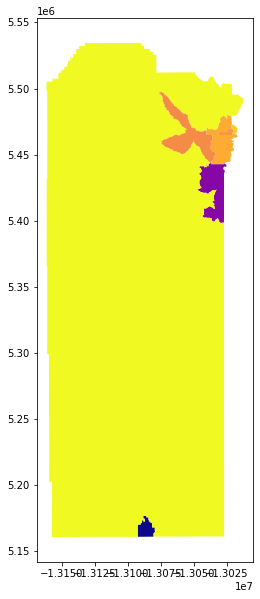

In [45]:
# Plot map
f, ax = plt.subplots(1, 1, figsize=(10,10))
malheur_pop.plot('B01003_001E', ax=ax, cmap='plasma')

<AxesSubplot:>

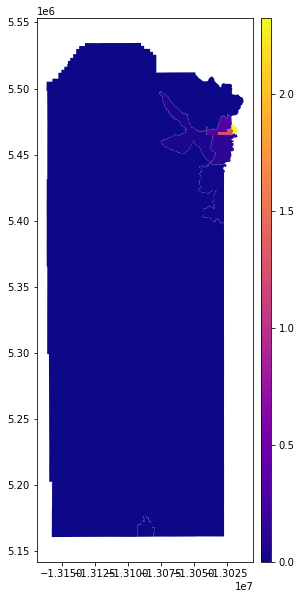

In [46]:
malheur_pop['pop_density'] = 1e4 * malheur_pop['B01003_001E'] / malheur_pop['geometry'].area

from mpl_toolkits.axes_grid1 import make_axes_locatable

# Plot map
f, ax = plt.subplots(1, 1, figsize=(10,10))

# These two lines make the colorbar the same size as the axes.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

malheur_pop.plot('pop_density', ax=ax, cmap='plasma', legend=True, cax=cax)

In [47]:
malheur_pop.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [48]:
# Make 
df_large = df[df['FIRE_SIZE'] > 100]
malheur_fires = df_large[df_large['FIPS_NAME'] == 'Malheur County']
malheur_fires.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [49]:
malheur_fires_proj = malheur_fires.to_crs('EPSG:3857')
malheur_fires_proj.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

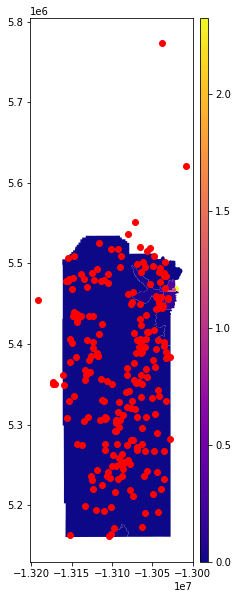

In [50]:
# Plot map
f, ax = plt.subplots(1, 1, figsize=(10,10))

# These two lines make the colorbar the same size as the axes.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

malheur_pop.plot('pop_density', ax=ax, cmap='plasma', legend=True, cax=cax)
malheur_fires_proj.plot(ax=ax, c='red')

/Users/jack/Documents/Anaconda3/anaconda3/envs/lab2/lib/python3.8/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/Users/jack/Documents/Anaconda3/anaconda3/envs/lab2/lib/python3.8/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 6
  Warn("Warning: setting k to %d" % k_q, UserWarning)


<AxesSubplot:>

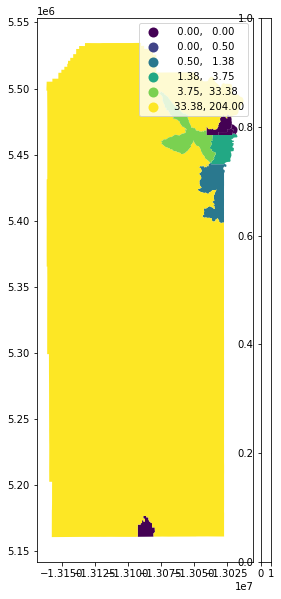

In [51]:
# Spatial join
joined_df = gpd.sjoin(malheur_fires_proj, malheur_pop, how='inner', predicate='intersects')

# Groupby tract
tract_count = joined_df.groupby(['tract'], as_index=False)['OBJECTID'].count()
tract_count.columns = ['tract', 'fire_count']

# Merge back to original DataFrame
merged_df = malheur_pop.merge(tract_count, on='tract', how='left')

# Clean up data by filling NaNs with 0
merged_df['fire_count'].fillna(0, inplace=True)  

# Plot map
f, ax = plt.subplots(1, 1, figsize=(10,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
merged_df.plot('fire_count', ax=ax, cmap='viridis', legend=True, cax=cax, scheme = 'quantiles',k=8)